## <center>Hierarchal Clustering</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Desktop/Python/Machine Learning/Unsupervised Learning/Hierarchal Clustering/Data Sets/cluster_mpg.csv')
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [5]:
df1 = pd.get_dummies(df.drop('name',axis=1))
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [6]:
from sklearn.preprocessing import MinMaxScaler # Recomended for hierarchical clustering

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)
df2 = pd.DataFrame(scaled_data,columns=df1.columns)

#### Visual Clustering

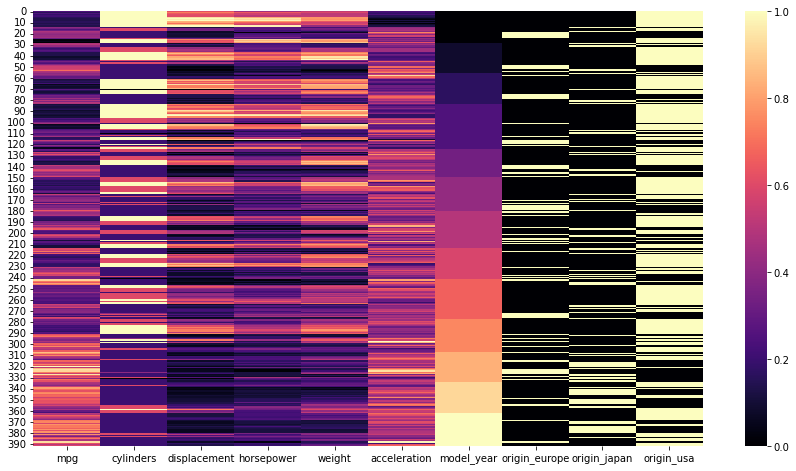

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df2,cmap='magma');

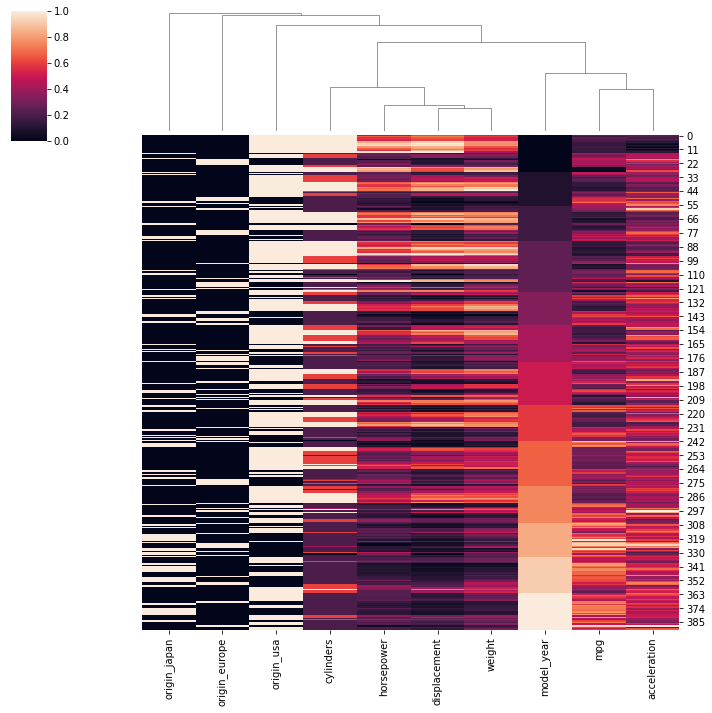

In [9]:
sns.clustermap(df2,row_cluster=False)
# Once scaled, for col features, dummy variables should be taken out, due to the fact that they have the biggest distance.

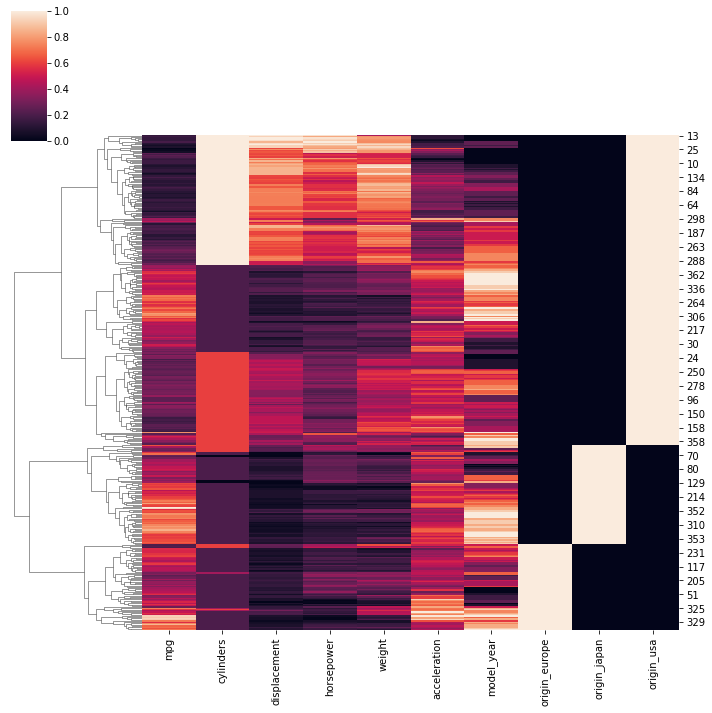

In [10]:
sns.clustermap(df2,col_cluster=False) # For index clustering, the interpretation is more difficult, however is 
# the interesting part in the exercise, the column clustering doesn't give much valuable information. 

### Agglomerative Clustering and Dendograms

In [11]:
from sklearn.cluster import AgglomerativeClustering
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |      If "precomputed",

In [12]:
model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(df2)
cluster_labels # Forces the data to fit in 4 clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

#### Choosing a Threshold Distance

 When declaring a distance_threshold, the n_cluster must be set to None, due to the fact that the number of cluters are calculated with this method


In [13]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0) # Assuming every point starts as its own cluster
cluster_labels = model.fit_predict(df2)
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

##### Linkage Model
A (n-1) by 4 matrix Z is returned. At the i-th iteration, clusters with indices Z[i, 0] and Z[i, 1] are combined to form cluster n + i. A cluster with an index less than n corresponds to one of the original observations. The distance between clusters Z[i, 0] and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] represents the number of original observations in the newly formed cluster.

In [14]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [15]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix # What does each instance in the matrix represents:

# Cluster 1       Cluster 2       Distance clusters  Points

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

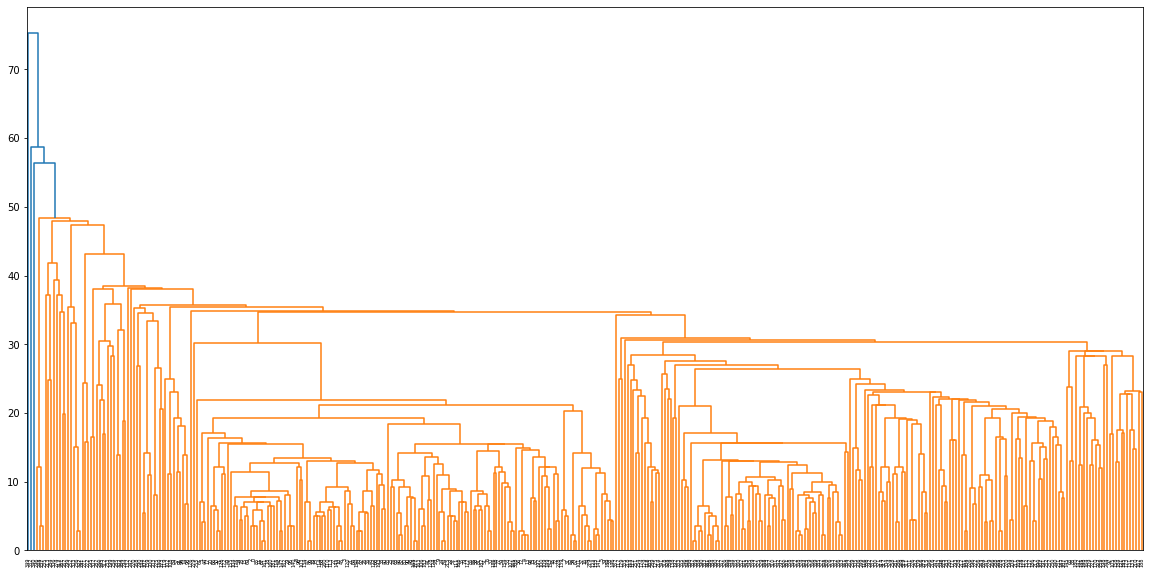

In [16]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix)

##### Truncating the dendogram

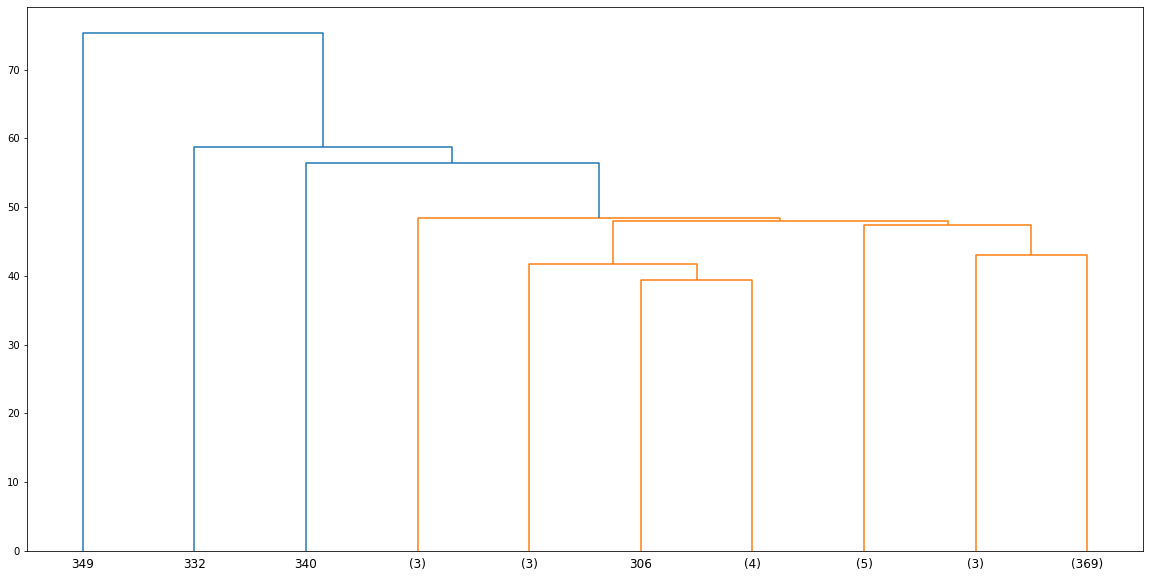

In [17]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='lastp', p=10)

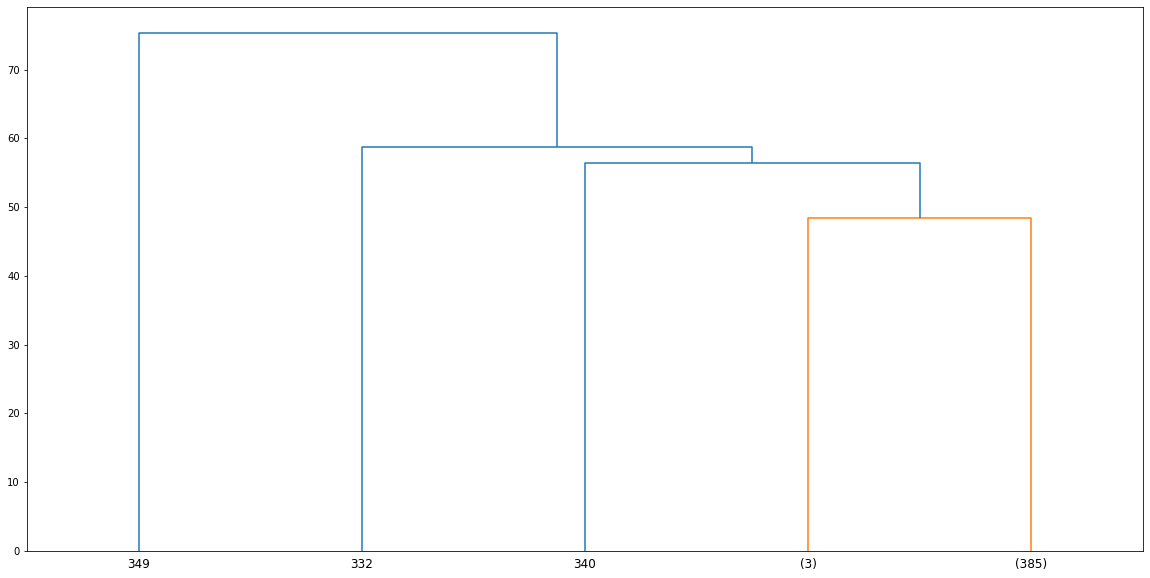

In [18]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='level', p=3)

The truncation methods helps to decide the number of clusters used in the Agglomerative Clustering

##### Creating a Model Based on Distance Threshold


There are many ways to calculate the distance to set on the threshold.
- Distance between max and min values in significant instance.
- Max distance found between all points.

In [19]:
# Distance between the max and min value in the category mpg

a = df2.iloc[df2['mpg'].idxmax()]
b = df2.iloc[df2['mpg'].idxmin()]
dist = np.linalg.norm(a-b)
dist

2.3852929970374714

In [20]:
model = AgglomerativeClustering(n_clusters=None,distance_threshold=dist)
cluster_labels = model.fit_predict(df2)
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 4, 4, 0, 1, 1, 1,
       1, 1, 4, 3, 3, 3, 3, 0, 7, 0, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3,
       4, 7, 4, 4, 7, 1, 1, 1, 0, 0, 1, 7, 0, 7, 1, 7, 7, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 1, 1, 7, 0, 0, 7, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 1, 3, 3, 3, 3, 4, 0, 7, 0,
       0, 7, 4, 1, 3, 3, 1, 1, 1, 1, 3, 1, 0, 3, 4, 4, 4, 0, 7, 0, 7, 4,
       4, 4, 3, 3, 3, 3, 3, 1, 1, 1, 0, 0, 7, 1, 1, 0, 0, 1, 4, 4, 4, 4,
       5, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 0, 7, 4, 7, 0, 1, 0, 4, 1, 4, 1,
       1, 1, 1, 0, 1, 1, 7, 7, 1, 5, 5, 5, 5, 4, 4, 4, 4, 7, 7, 1, 0, 9,
       4, 9, 4, 1, 0, 0, 7, 1, 5, 8, 0, 1, 5, 5, 5, 5, 0, 2, 8, 7, 0, 5,
       5, 5, 5, 9, 9, 9, 9, 5, 5, 5, 5, 1, 7, 0, 7, 2, 2, 0, 1, 0, 1, 0,
       8, 2, 0, 6, 0, 5, 5, 5, 9, 9, 9, 7, 9, 9, 9, 9, 9, 9, 5, 9, 5, 5,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 8, 0, 9, 9, 2, 9, 9, 5, 5, 5,
       5, 5, 5, 5, 5, 8, 0, 2, 2, 8, 5, 8, 5, 2, 2,

In [21]:
lent = np.unique(cluster_labels)
lent

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [22]:
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

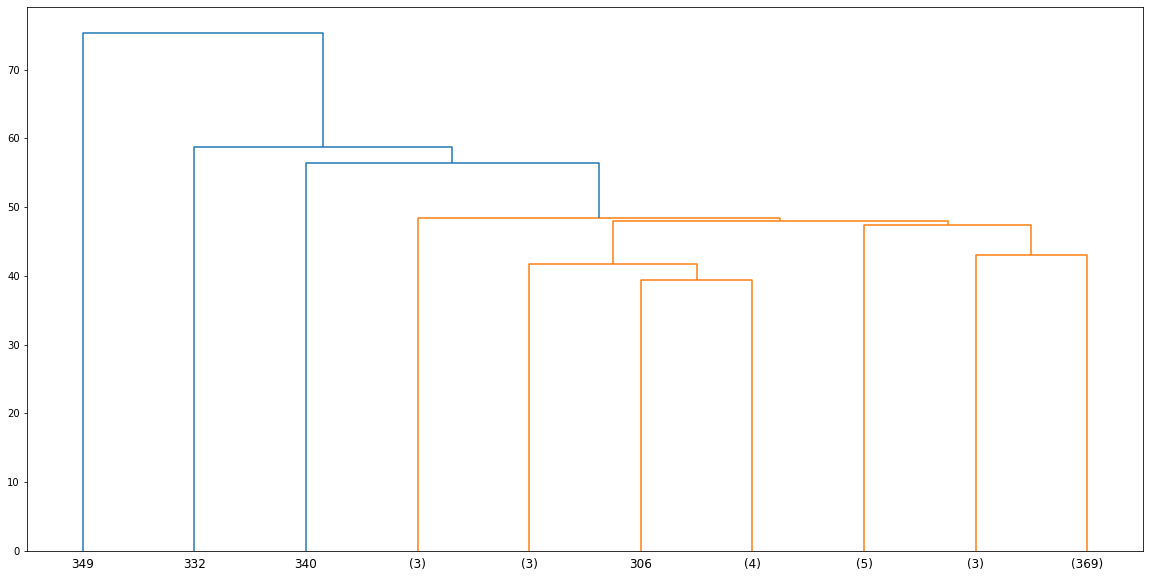

In [23]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=len(lent))

Max distance between all points. The fact that the MinMaxScaler is used, enables to determine the max distance between points, which is:

$$ max_d = \sqrt{n_{features}}$$

In [24]:
max_dist = np.sqrt(df2.shape[1])

model = AgglomerativeClustering(n_clusters=None,distance_threshold=max_dist)
cluster_labels = model.fit_predict(df2)
cluster_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 1, 1, 4, 2, 2, 2,
       2, 2, 1, 3, 3, 3, 3, 4, 0, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 0, 1, 1, 0, 2, 2, 2, 4, 4, 2, 0, 4, 0, 2, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 0, 4, 4, 0, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 1, 4, 0, 4,
       4, 0, 1, 2, 3, 3, 2, 2, 2, 2, 3, 2, 4, 3, 1, 1, 1, 4, 0, 4, 0, 1,
       1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 4, 4, 0, 2, 2, 4, 4, 2, 1, 1, 1, 1,
       5, 3, 3, 3, 1, 1, 1, 1, 1, 5, 5, 4, 0, 1, 0, 4, 2, 4, 1, 2, 1, 2,
       2, 2, 2, 4, 2, 2, 0, 0, 2, 5, 5, 5, 5, 1, 1, 1, 1, 0, 0, 2, 4, 1,
       1, 1, 1, 2, 4, 4, 0, 2, 5, 2, 4, 2, 5, 5, 5, 5, 4, 0, 2, 0, 4, 5,
       5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5, 2, 0, 4, 0, 0, 0, 4, 2, 4, 2, 4,
       2, 0, 4, 6, 4, 5, 5, 5, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5,
       0, 4, 4, 0, 4, 0, 0, 4, 2, 2, 2, 2, 2, 4, 1, 1, 0, 1, 1, 5, 5, 5,
       5, 5, 5, 5, 5, 2, 4, 0, 0, 2, 5, 2, 5, 0, 0,

In [25]:
lent = np.unique(cluster_labels)
lent

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

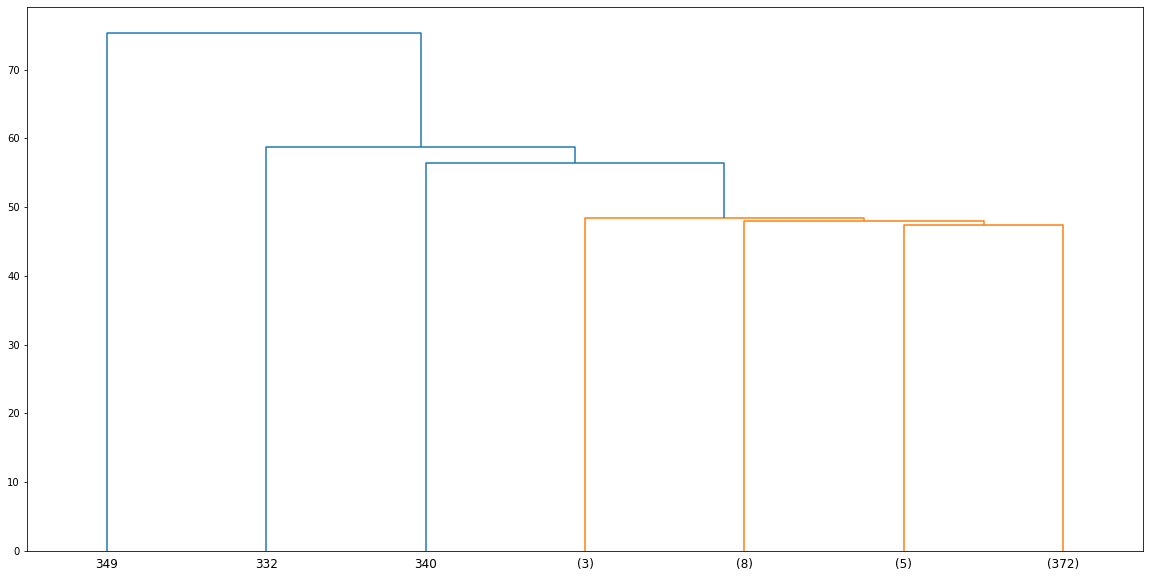

In [26]:
linkage_matrix = hierarchy.linkage(model.children_)
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=len(lent))